In [5]:
import numpy as np
from scipy.stats import pearsonr
from ninolearn.IO.read_processed import data_reader
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
reader = data_reader(startdate='1960-01', enddate='2017-12')

# ONI index is target variable
y = reader.read_csv('oni')
np.random.seed(0)
X = np.random.uniform(size=(len(y), 1000))

model = LinearRegression()

r:0.9999999999999998, p: 0.0


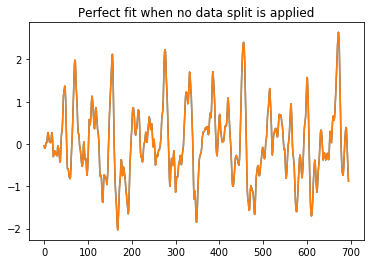

In [6]:

# =============================================================================
# Fit and evaluate on entire data set
# =============================================================================
model.fit(X, y)
oni_predict = model.predict(X)

plt.figure()
plt.title('Perfect fit when no data split is applied')
plt.plot(y.values)
plt.plot(oni_predict)

r,p = pearsonr(oni_predict, y)
print(f'r:{r}, p: {p}' )


r:-0.06322109812396517, p: 0.3786886745595523


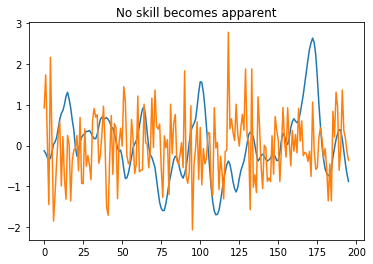

In [7]:
# =============================================================================
# Fit on train data set and evaluate on test data set
# =============================================================================
Xtrain, Xtest = X[:500], X[500:]
ytrain, ytest = y[:500], y[500:]

model.fit(Xtrain, ytrain)
y_predict = model.predict(Xtest)

plt.figure()
plt.title('No skill becomes apparent')

plt.plot(ytest.values)
plt.plot(y_predict)

r,p = pearsonr(y_predict, ytest)
print(f'r:{r}, p: {p}' )